In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import np_utils

Using TensorFlow backend.


In [2]:
# load (downloaded if needed) the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_test_copy = X_test.copy()
print(type(X_train))
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

<class 'numpy.ndarray'>
(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


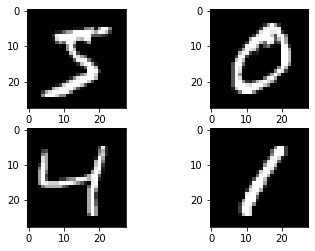

In [3]:
# plot 4 images as gray scale
plt.subplot(2,2,1)
plt.imshow(X_train[0], 'gray')
plt.subplot(2,2,2)
plt.imshow(X_train[1], 'gray')
plt.subplot(2,2,3)
plt.imshow(X_train[2], 'gray')
plt.subplot(2,2,4)
plt.imshow(X_train[3], 'gray')
# show the plot
plt.show()

In [4]:
#Creating a simple neural network model

In [5]:
# Concept check- reshape()
# x = np.zeros((5,4,3), np.uint8)
# print(x)
# y = x.reshape((x.shape[0], 12))
# print(y)

In [6]:
# flatten 28*28 images to a 784 vector for each image
num_pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape((X_train.shape[0], num_pixels)).astype('float32')
X_test = X_test.reshape((X_test.shape[0], num_pixels)).astype('float32')

# Each of X_train and X_test becomes (60000, 28*28) 2d matrices

In [7]:
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255

In [8]:
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

print(y_train.shape)
# print(y_train)
# Here, suppose 2nd column of y_train contains n ones. Then there are n entries of 2 in the original array

(60000, 10)


In [9]:
# Single hidden layer

In [10]:
# define baseline model
def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(num_pixels, input_dim=num_pixels, kernel_initializer='normal', activation='relu'))
    model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# Executing model

In [11]:
# build the model
model = baseline_model()
# Fit the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200)


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 9s 152us/step - loss: 0.2819 - accuracy: 0.9197 - val_loss: 0.1435 - val_accuracy: 0.9588
Epoch 2/10
60000/60000 [==============================] - 8s 126us/step - loss: 0.1124 - accuracy: 0.9674 - val_loss: 0.0925 - val_accuracy: 0.9730
Epoch 3/10
60000/60000 [==============================] - 8s 128us/step - loss: 0.0727 - accuracy: 0.9796 - val_loss: 0.0745 - val_accuracy: 0.9769
Epoch 4/10
60000/60000 [==============================] - 8s 128us/step - loss: 0.0509 - accuracy: 0.9855 - val_loss: 0.0695 - val_accuracy: 0.9771
Epoch 5/10
60000/60000 [==============================] - 7s 119us/step - loss: 0.0359 - accuracy: 0.9898 - val_loss: 0.0611 - val_accuracy: 0.9807
Epoch 6/10
60000/60000 [==============================] - 8s 128us/step - loss: 0.0277 - accuracy: 0.9926 - val_loss: 0.0629 - val_accuracy: 0.9803
Epoch 7/10
60000/60000 [==============================] - 7s 1

In [12]:
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))
print(scores)

Baseline Error: 1.71%
[0.05540126249896712, 0.9829000234603882]


In [13]:
history_dict = history.history
print(history_dict.keys())

# This dict can be used to plot the losses and accuracies

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


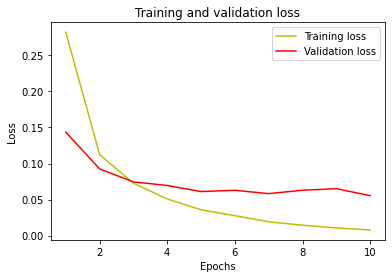

In [14]:
# Plotting the loss during training and validation

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

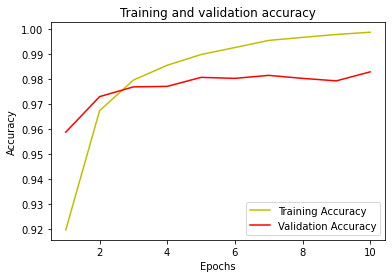

In [15]:
# Plotting the accuracy during training and validation

accu = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, accu, 'y', label = 'Training Accuracy')
plt.plot(epochs, val_acc, 'r', label = 'Validation Accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Checking individual entries

Detected number:  8


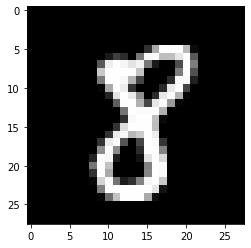

In [16]:
i = 134

plt.imshow(X_test_copy[i], 'gray')
prediction = model.predict(X_test)
print('Detected number: ', np.argmax(prediction[i]))